1. GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.
2. For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
3. Describe the behavior you see in the plots in terms of the law of large numbers.
4. PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing 
5. Extra Credit: FIT a gaussian to the distribution of means

In [4]:
from __future__ import print_function
__author__= 'Franz Loza'

import pylab as pl
# this package sets up pretty plots
#import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np

%pylab inline

#Seaborn not working in python 2 or 3

Populating the interactive namespace from numpy and matplotlib


Chisq mean: 99.71, standard deviation: 13.43


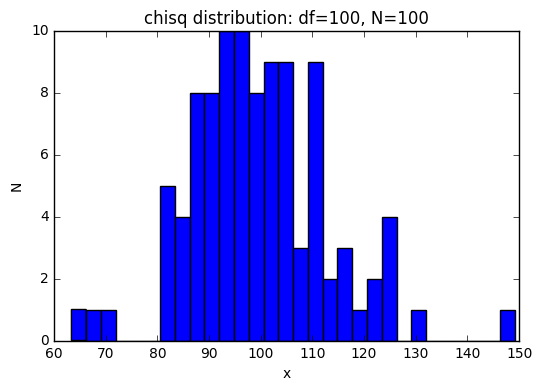

In [13]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']
dist = 'chisq'
mymean = 100
dfsize = 100
nsize  = 100
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

md = {}
# md is an empty dictionary
md[dist] = np.random.chisquare(df, size=dfsize)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md[dist], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title(dist + ' distribution: df=' + str(dfsize) + ', N=' + str(nsize))

print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

In [ ]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
#print (mysize, mysize.shape)

#Plot the sample mean (dependent var.) against the sample size N (independent var.)
md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

In [ ]:
#Describe the behavior you see in the plots in terms of the law of large numbers.

In [ ]:
#PLOT the distributions of all sample means (together for all distributions
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

In [ ]:
#Normal distribution

In [ ]:
#Poisson distribution

In [ ]:
#Binomial distribution

In [ ]:
#Other

In [ ]:
#Extra Credit: FIT a gaussian to the distribution of means